# Picky file parsing example

In [1]:
from probe import *

%load_ext autoreload
%autoreload 2

## Single file 

In [5]:
# set input 
input_file = '/home/unix/jiahao/wanglab/Documents/probe/Drosophila/rna/Drosophila_rna_15_10.picky'
source_index = 1

In [6]:
%%time
# parse single file 
df = parse_picky_new(input_file, source_index)
print(df.shape)
df.head()

/home/unix/jiahao/wanglab/jiahao/Github/probe-design/scripts/2.filtration/probe.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, current_df], ignore_index=True)


(28265, 13)
CPU times: user 1min 51s, sys: 36.9 ms, total: 1min 51s
Wall time: 1min 51s


,Annotation,Start,End,TargetSequence,Tm,ReverseComplement,Primer,Primer Tm,Spacer,Padlock,Padlock Tm,DeltaTm,source_index
0,128up-RA,87,132,GGGGTTTTCTGTGAACCGCGTTTAACTCTCAGCCAGCCATGAGCAC,85.39,GTGCTCATGGCTGGCTGAGAGTTAAACGCGGTTCACAGAAAACCCC,GTGCTCATGGCTGGCTGAGA,73.937162,GT,TAAACGCGGTTCACAGAAAACCCC,73.901436,0.035726,1
1,128up-RA,777,822,ACATCACCCTGAGATACGACGCCACTAGTGACGACCTCATTGACGT,86.07,ACGTCAATGAGGTCGTCACTAGTGGCGTCGTATCTCAGGGTGATGT,ACGTCAATGAGGTCGTCACTAGT,71.675464,GG,CGTCGTATCTCAGGGTGATGT,70.183656,1.491808,1
2,14-3-3epsilon-RD,3156,3198,ATTGAGTTTGGGGCTCGTGTTTTTATGGGCTTGTTTAAATGGT,80.62,ACCATTTAAACAAGCCCATAAAAACACGAGCCCCAAACTCAAT,ACCATTTAAACAAGCCCATAAA,65.525944,AA,CACGAGCCCCAAACTCAAT,69.846095,4.320150,1
3,18w-RA,193,234,ACGCAAAGCCAGCTCACACCAGGATTACAGAGCACTCGGGCT,88.77,AGCCCGAGTGCTCTGTAATCCTGGTGTGAGCTGGCTTTGCGT,AGCCCGAGTGCTCTGTAATCC,72.963347,TG,GTGTGAGCTGGCTTTGCGT,72.954383,0.008964,1
4,18w-RA,2736,2780,ACCGTATCCCTCAGGATGTGAGCGATCTCTACTTGGATGGCAACA,84.78,TGTTGCCATCCAAGTAGAGATCGCTCACATCCTGAGGGATACGGT,TGTTGCCATCCAAGTAGAGATCG,70.741793,CT,CACATCCTGAGGGATACGGT,70.226235,0.515558,1


## Multiple file 

In [16]:
# set input
input_path = '/home/unix/jiahao/wanglab/Documents/probe/Drosophila/picky'
files = sorted([ f for f in os.listdir(input_path) if '.picky' in f])
print(files)

['Drosophila_cds_15_10.picky', 'Drosophila_cds_18_15.picky', 'Drosophila_cds_20_15.picky', 'Drosophila_rna_15_10.picky', 'Drosophila_rna_18_15.picky', 'Drosophila_rna_20_15.picky']


In [17]:
%%time
# setup multiple proessing for parsing the files 
input_file_1 = os.path.join(input_path, files[0])
input_file_2 = os.path.join(input_path, files[1])
input_file_3 = os.path.join(input_path, files[2])
input_file_4 = os.path.join(input_path, files[3])
input_file_5 = os.path.join(input_path, files[4])
input_file_6 = os.path.join(input_path, files[5])

p = [(input_file_1, 1), (input_file_2, 3), (input_file_3, 5),
    (input_file_4, 2), (input_file_5, 4), (input_file_6, 6)] # (input_file_path, source_index)

pool = mp.Pool(processes = (mp.cpu_count()))
results = pool.starmap(parse_picky_new, p)
pool.close()
pool.join()

df_combined = pd.concat(results)
print(df_combined.shape)
df_combined.head()

/home/unix/jiahao/wanglab/jiahao/Github/probe-design/scripts/2.filtration/probe.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, current_df], ignore_index=True)
/home/unix/jiahao/wanglab/jiahao/Github/probe-design/scripts/2.filtration/probe.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, current_df], ignore_index=True)
/home/unix/jiahao/wanglab/jiahao/Github/probe-design/scripts/2.filtration/probe.py:124: FutureWarning: The behavior of DataFrame

(241893, 13)
CPU times: user 347 ms, sys: 269 ms, total: 616 ms
Wall time: 7min 54s


,Annotation,Start,End,TargetSequence,Tm,ReverseComplement,Primer,Primer Tm,Spacer,Padlock,Padlock Tm,DeltaTm,source_index
0,128up-RA,901,942,AGCTGCCCGATTACAACTCGCCCGTGGTACTCCACAACGAGC,87.20,GCTCGTTGTGGAGTACCACGGGCGAGTTGTAATCGGGCAGCT,GCTCGTTGTGGAGTACCACG,71.786997,GG,CGAGTTGTAATCGGGCAGCT,71.569376,0.217621,1
1,128up-RA,409,454,CTGTCGCTCGCACCTGTAACCTCATTTTCATGGTGCTGGATTGCCT,85.86,AGGCAATCCAGCACCATGAAAATGAGGTTACAGGTGCGAGCGACAG,AGGCAATCCAGCACCATGAAAATG,72.575006,AG,GTTACAGGTGCGAGCGACAG,72.012944,0.562062,1
2,128up-RA,304,346,TGCCGGGATGCATTAAGTACAAGGGCGCTAAGATCCAGCTGCT,86.68,AGCAGCTGGATCTTAGCGCCCTTGTACTTAATGCATCCCGGCA,AGCAGCTGGATCTTAGCGC,71.805213,CC,TTGTACTTAATGCATCCCGGCA,71.199044,0.606169,1
3,128up-RA,652,697,ACATCACCCTGAGATACGACGCCACTAGTGACGACCTCATTGACGT,86.07,ACGTCAATGAGGTCGTCACTAGTGGCGTCGTATCTCAGGGTGATGT,ACGTCAATGAGGTCGTCACTAGT,71.675464,GG,CGTCGTATCTCAGGGTGATGT,70.183656,1.491808,1
4,18w-RA,357,400,ACCCTGGAGTCACACAACGCGGTCTGGGGTCCGGGAAAGACCCT,91.69,AGGGTCTTTCCCGGACCCCAGACCGCGTTGTGTGACTCCAGGGT,AGGGTCTTTCCCGGACCCCA,77.227737,GA,CCGCGTTGTGTGACTCCAGGGT,77.648504,0.420767,1


In [19]:
df_combined.tail()

,Annotation,Start,End,TargetSequence,Tm,ReverseComplement,Primer,Primer Tm,Spacer,Padlock,Padlock Tm,DeltaTm,source_index
57987,zye-RA,1236,1280,ACGAAACTCCGCAAACTACGTCCCTACCCAGTTGTCCTTTGGGCT,87.18,AGCCCAAAGGACAACTGGGTAGGGACGTAGTTTGCGGAGTTTCGT,AGCCCAAAGGACAACTGGGT,73.707556,AG,GGACGTAGTTTGCGGAGTTTCGT,73.353639,0.353918,6
57988,zye-RA,2266,2305,CAGACGCTGTCCCCAAGAACCCGTGACGACATCAAGGCCG,86.88,CGGCCTTGATGTCGTCACGGGTTCTTGGGGACAGCGTCTG,CGGCCTTGATGTCGTCACG,72.435398,G,GTTCTTGGGGACAGCGTCTG,72.035113,0.400285,6
57989,zye-RA,1394,1434,AGATCTTCGACCAAGCCGCGTTGCTATCCCGGATCAACGGA,87.07,TCCGTTGATCCGGGATAGCAACGCGGCTTGGTCGAAGATCT,TCCGTTGATCCGGGATAGCAA,72.535964,C,GCGGCTTGGTCGAAGATCT,71.675740,0.860224,6
57990,zye-RA,2498,2542,AGTCGCTGCCCGCAGACACCGCGAACTACGCAACAGCCAAGGTGT,91.89,ACACCTTGGCTGTTGCGTAGTTCGCGGTGTCTGCGGGCAGCGACT,ACACCTTGGCTGTTGCGTAGTTCG,75.522975,CG,GTGTCTGCGGGCAGCGACT,76.772505,1.249530,6
57991,zye-RA,615,655,ATACACCGAGTGGGCCGGTAGAGTGCTGGATGGAGATCGGG,88.05,CCCGATCTCCATCCAGCACTCTACCGGCCCACTCGGTGTAT,CCCGATCTCCATCCAGCACT,73.024120,C,TACCGGCCCACTCGGTGTAT,74.568086,1.543966,6


In [18]:
df_combined.to_csv('/home/unix/jiahao/wanglab/Documents/probe/Drosophila/rna/parsed_results.csv')

## Filtering

In [2]:
import os
import pandas as pd
import seaborn as sns
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import Bio.SeqIO

In [18]:
# read parsed files 
input_path = '/home/unix/jiahao/wanglab/Documents/probe/Drosophila/picky'
input_df1 = pd.read_csv(os.path.join(input_path, 'parsed_results.csv'), index_col=0)
input_df1.head()

,Annotation,Start,End,TargetSequence,Tm,ReverseComplement,Primer,Primer Tm,Spacer,Padlock,Padlock Tm,DeltaTm,source_index
0,128up-RA,901,942,AGCTGCCCGATTACAACTCGCCCGTGGTACTCCACAACGAGC,87.20,GCTCGTTGTGGAGTACCACGGGCGAGTTGTAATCGGGCAGCT,GCTCGTTGTGGAGTACCACG,71.786997,GG,CGAGTTGTAATCGGGCAGCT,71.569376,0.217621,1
1,128up-RA,409,454,CTGTCGCTCGCACCTGTAACCTCATTTTCATGGTGCTGGATTGCCT,85.86,AGGCAATCCAGCACCATGAAAATGAGGTTACAGGTGCGAGCGACAG,AGGCAATCCAGCACCATGAAAATG,72.575006,AG,GTTACAGGTGCGAGCGACAG,72.012944,0.562062,1
2,128up-RA,304,346,TGCCGGGATGCATTAAGTACAAGGGCGCTAAGATCCAGCTGCT,86.68,AGCAGCTGGATCTTAGCGCCCTTGTACTTAATGCATCCCGGCA,AGCAGCTGGATCTTAGCGC,71.805213,CC,TTGTACTTAATGCATCCCGGCA,71.199044,0.606169,1
3,128up-RA,652,697,ACATCACCCTGAGATACGACGCCACTAGTGACGACCTCATTGACGT,86.07,ACGTCAATGAGGTCGTCACTAGTGGCGTCGTATCTCAGGGTGATGT,ACGTCAATGAGGTCGTCACTAGT,71.675464,GG,CGTCGTATCTCAGGGTGATGT,70.183656,1.491808,1
4,18w-RA,357,400,ACCCTGGAGTCACACAACGCGGTCTGGGGTCCGGGAAAGACCCT,91.69,AGGGTCTTTCCCGGACCCCAGACCGCGTTGTGTGACTCCAGGGT,AGGGTCTTTCCCGGACCCCA,77.227737,GA,CCGCGTTGTGTGACTCCAGGGT,77.648504,0.420767,1



Number of records before filtering: 241893
Number of genes before filtering: 16640

Number of records removed due to having same target sequence: 123442
Number of records removed due to having continuous single nucleotide sequence: 13161

Number of records after filtering: 105290
Number of genes left after filtering: 16038



/home/unix/jiahao/anaconda3/envs/probe/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/unix/jiahao/anaconda3/envs/probe/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

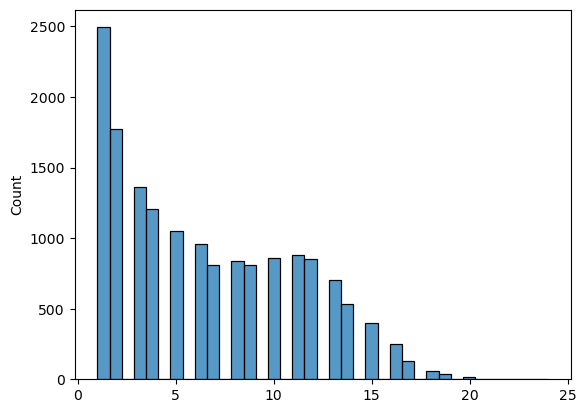

In [19]:
# edit annotations 
# id_list = []
# gene_list = []
# intron_list = []

# for current_record in input_df1['Annotation'].to_list():
#     fields = current_record.split('_')
#     id_list.append(fields[0] + '_' + fields[1])
#     gene_list.append(fields[2])
#     intron_list.append(fields[3] + '_' + fields[4])
    
# input_df1['Id'] = id_list
# input_df1['Gene'] = gene_list
# input_df1['Intron'] = intron_list

# filtering 
n_records_org = input_df1.shape[0]
n_genes_org = input_df1['Annotation'].nunique()

# remove records with same target sequence 
filtered_df1 = input_df1.drop_duplicates(['TargetSequence'])
n_records_removed_same_ts = n_records_org - filtered_df1.shape[0]

# remove records with continuous single nucleotide sequence
sns_drop = ['AAAAA', 'TTTTT', 'GGGGG', 'CCCCC']
filtered_df1 = filtered_df1[~filtered_df1['ReverseComplement'].str.contains('|'.join(sns_drop))]
n_records_removed_csns = n_records_org - n_records_removed_same_ts - filtered_df1.shape[0]

ordered_col = ['Annotation',
              'Start', 'End', 'TargetSequence', 'Tm',
               'ReverseComplement', 'Primer', 'Primer Tm', 'Spacer', 'Padlock',
               'Padlock Tm', 'DeltaTm', 'source_index']
filtered_df1 = filtered_df1[ordered_col]
filtered_df1 = filtered_df1.sort_values(by=['Annotation', 'source_index'])

filtered_df1 = filtered_df1.reset_index(drop = True)
filtered_df1['temp_index'] = filtered_df1.index.astype(str)
filtered_df1['fasta_id'] = filtered_df1[['Annotation', 'temp_index']].apply(lambda x: '_'.join(x), axis=1)
filtered_df1 = filtered_df1.drop(columns='temp_index')

# print log
print(
f'''
Number of records before filtering: {n_records_org}
Number of genes before filtering: {n_genes_org}

Number of records removed due to having same target sequence: {n_records_removed_same_ts}
Number of records removed due to having continuous single nucleotide sequence: {n_records_removed_csns}

Number of records after filtering: {filtered_df1.shape[0]}
Number of genes left after filtering: {filtered_df1['Annotation'].nunique()}
''')

# plot distribution 
sns.histplot(filtered_df1['Annotation'].value_counts().to_list())

In [20]:
# output files 

def make_seq_record(seq, name):
    seq_record = SeqRecord(Seq(seq), id = name, description = '', letter_annotations = {"phred_quality":[40] * len(seq)})
    return seq_record

seq_records = map(make_seq_record, filtered_df1.TargetSequence, filtered_df1.fasta_id)

# output FASTA
with open(os.path.join(input_path, 'parsed_probes.fa'), 'w') as output_file_fa:   
    Bio.SeqIO.write(seq_records, output_file_fa, 'fasta')

# output FASTQ w/ fake quality score
with open(os.path.join(input_path, 'parsed_probes.fq'), 'w') as output_file_fq:   
    Bio.SeqIO.write(seq_records, output_file_fq, 'fastq')

# output the matrix
filtered_df1.to_csv(os.path.join(input_path, 'filtered_records.csv'))

# output log
with open(os.path.join(input_path, 'log_filtering.txt'), 'w') as output_file:   
    print(
f'''Number of records before filtering: {n_records_org}
Number of genes before filtering: {n_genes_org}

Number of records removed due to having same target sequence: {n_records_removed_same_ts}
Number of records removed due to having continuous single nucleotide sequence: {n_records_removed_csns}

Number of records after filtering: {filtered_df1.shape[0]}
Number of genes left after filtering: {filtered_df1['Annotation'].nunique()}
''', file=output_file)

## Filtering based on bbmap (dedupe.sh)

In [21]:
start_time = time.time()

input_path = '/home/unix/jiahao/wanglab/Documents/probe/Drosophila/picky'
input_dir = os.path.join(input_path, 'clust/')
files = sorted([ f for f in os.listdir(input_dir) if 'cluster' in f ])
files_path = map(lambda x: input_dir + x, files)

table_path = os.path.join(input_path, 'filtered_records.csv')
df = pd.read_csv(table_path, index_col=0)

In [22]:
dup_file = os.path.join(input_path, 'dup.fa')
dup_index = parse_dup(dup_file)

pool = mp.Pool(processes = (mp.cpu_count()))
results = pool.map(parse_cluster, files_path)
pool.close()
pool.join()

merged = list(itertools.chain(*results)) + dup_index

df = df.drop(merged).reset_index(drop = True)

In [24]:
print(f'''After dedupe.sh\nNumber of records remained: {df.shape[0]}
Number of genes left after filtering: {df['Annotation'].nunique()}''')

After dedupe.sh
Number of records remained: 76655
Number of genes left after filtering: 16038


/home/unix/jiahao/anaconda3/envs/probe/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/unix/jiahao/anaconda3/envs/probe/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

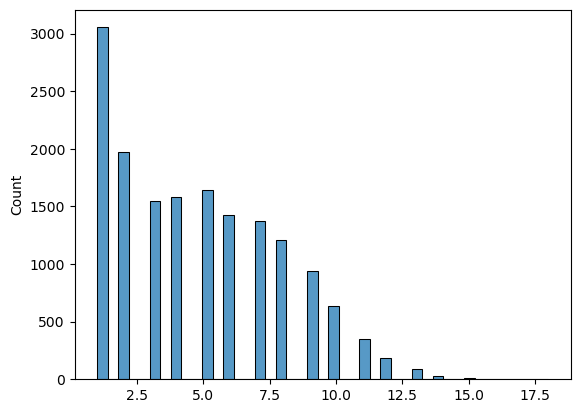

In [25]:
# plot distribution 
sns.histplot(df['Annotation'].value_counts().to_list())

In [26]:
# output the matrix
df.to_csv(os.path.join(input_path, 'final_records.csv'))